# 3 ROOT Macros
You know how other books go on and on about programming fundamentals and finally work up to building a complete, working program? Let’s skip all that. In this guide, we will describe macros executed by the ROOT C++ interpreter Cling.

It is relatively easy to compile a macro, either as a pre-compiled library to load into ROOT, or as a stand-alone application, by adding some include statements for header file or some “dressing code” to any macro.

## 3.1 General Remarks on ROOT macros

If you have a number of lines which you were able to execute at the ROOT prompt, they can be turned into a ROOT macro by giving them a name which corresponds to the file name without extension. The general structure for a macro stored in file ```MacroName.C``` is:

```C++
void MacroName() {
        <          ...
          your lines of C++ code
                   ...             >
}
```

The macro is executed by typing:

```sh
 > root MacroName.C
```

at the system prompt, or executed using ```Bash .x``` at the ROOT prompt.

```zsh 
 > root 
 root [0] .x MacroName.C
```

 Or it can be loaded into a ROOT session and then be executed by typing:
 
```sh
root [0].L MacroName.C
root [1] MacroName();
```
at the ROOT prompt.Note that more than one macro can be loaded this way, as each macro has a unique name in the ROOT name space. A small set of options can help making your plot nicer.

```C++
gROOT->SetStyle("Plain");   // set plain TStyle
gStyle->SetOptStat(111111); // draw statistics on plots,
                            // (0) for no output
gStyle->SetOptFit(1111);    // draw fit results on plot,
                            // (0) for no ouput
gStyle->SetPalette(57);     // set color map
gStyle->SetOptTitle(0);     // suppress title box
```

Next, you should create a canvas for graphical output, with size, subdivisions and format suitable to your needs, see documentation of class ```TCanvas```:

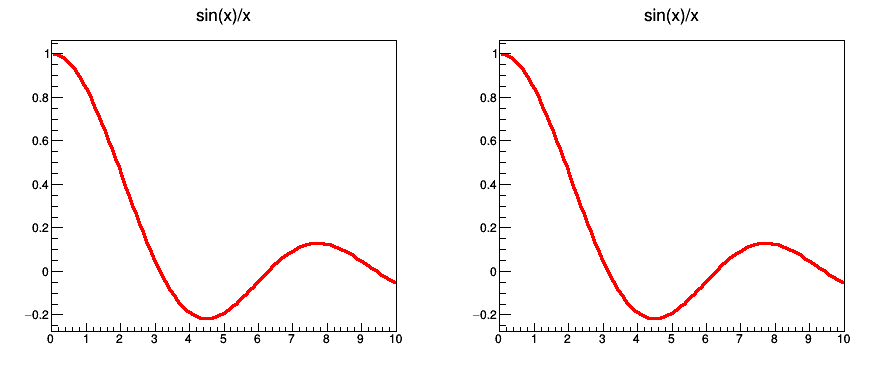

In [1]:
TCanvas canvas_3_1("3-1-Canvas","<Title>",0,0,900,400); 
canvas_3_1.Divide(2,1); 
canvas_3_1.cd(1); 
TF1 f1("f1","sin(x)/x",0.,10.);
f1.Draw();
canvas_3_1.cd(2);
TF1 f2("f2","sin(x)/x",0.,10.);
f2.Draw();
canvas_3_1.Draw();

These parts of a well-written macro are pretty standard, and you should remember to include pieces of code like in the examples above to make sure your plots always look as you had intended.

Below, in section Interpretation and Compilation, some more code fragments will be shown, allowing you to use the system compiler to compile macros for more efficient execution, or turn macros into stand-alone applications linked against the ROOT libraries.

## 3.2 A more complete example

Let us now look at a rather complete example of a typical task in data analysis, a macro that constructs a graph with errors, fits a (linear) model to it and saves it as an image. To run this macro, simply type in the shell:

```
 > root macro1.C
```

The code is built around the ROOT class ```TGraphErrors```, which was already introduced previously. Have a look at it in the class reference guide, where you will also find further examples. The macro shown below uses additional classes, ```TF1``` to define a function, TCanvas to define size and properties of the window used for our plot, and ```TLegend``` to add a nice legend. For the moment, ignore the commented include statements for header files, they will only become important at the end in section Interpretation and Compilation.

In [2]:
%%cpp -d

// Builds a graph with errors, displays it and saves it as
// image. First, include some header files
// (not necessary for Cling)

#include "TCanvas.h"
#include "TROOT.h"
#include "TGraphErrors.h"
#include "TF1.h"
#include "TLegend.h"
#include "TArrow.h"
#include "TLatex.h"
    
    
void macro3_2_1(){   //#1
    // The values and the errors on the Y axis
    const int n_points=10;
    double x_vals[n_points]=
            {1,2,3,4,5,6,7,8,9,10};
    double y_vals[n_points]=
            {6,12,14,20,22,24,35,45,44,53};
    double y_errs[n_points]=
            {5,5,4.7,4.5,4.2,5.1,2.9,4.1,4.8,5.43};

    // Instance of the graph
    //#2
    TGraphErrors graph(n_points,x_vals,y_vals,nullptr,y_errs);
    graph.SetTitle("Measurement XYZ;lenght [cm];Arb.Units");

    // Make the plot estetically better
    //#3
    graph.SetMarkerStyle(kOpenCircle);
    graph.SetMarkerColor(kBlue);
    graph.SetLineColor(kBlue);

    // The canvas on which we'll draw the graph
    //#4
    auto  Canvas_3_2_1 = new TCanvas();

    // Draw the graph !
    //#5
    graph.DrawClone("APE");

    // Define a linear function
    //#6
    TF1 function_3_2_1("Linear law","[0]+x*[1]",.5,10.5);
    // Let's make the funcion line nicer
    //#7
    function_3_2_1.SetLineColor(kRed);  function_3_2_1.SetLineStyle(2);
    // Fit it to the graph and draw it
    //#8
    graph.Fit(&function_3_2_1);
    function_3_2_1.DrawClone("Same");

    // Build and Draw a legend
    //#9
    TLegend leg(.1,.7,.3,.9,"Lab. Lesson 1");
    leg.SetFillColor(0);
    graph.SetFillColor(0);
    leg.AddEntry(&graph,"Exp. Points");
    leg.AddEntry(&function_3_2_1,"Th. Law");
    leg.DrawClone("Same");

    // Draw an arrow on the canvas
    //#10
    TArrow arrow(8,8,6.2,23,0.02,"|>");
    arrow.SetLineWidth(2);
    arrow.DrawClone();

    // Add some text to the plot
    //#11
    TLatex text(8.2,7.5,"#splitline{Maximum}{Deviation}");
    text.DrawClone();

    /*this command will create a pdf file with the graph in the same folder. 
    If you want to use it you can uncoment it and comment the Draw command bellow.*/
    //#12
    
    //mycanvas->Print("graph_with_law.pdf");
    Canvas_3_2_1->Draw();
}


Let’s give a look to the obtained plot. Beautiful outcome for such a small bunch of lines, isn’t it ?

Your first plot with data points, a fit of an analytical function, a legend and some additional information in the form of graphics primitives and text. A well formatted plot, clear for the reader is crucial to communicate the relevance of your results to the reader.

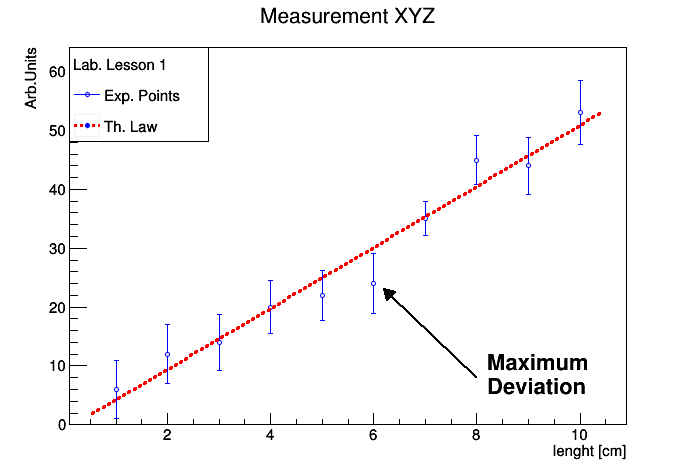

 FCN=3.84883 FROM MIGRAD    STATUS=CONVERGED      31 CALLS          32 TOTAL
                     EDM=5.96982e-22    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -1.01604e+00   3.33409e+00   1.48321e-03  -8.98235e-12
   2  p1           5.18756e+00   5.30717e-01   2.36095e-04   9.40487e-12


In [3]:
macro3_2_1();

Let’s comment it in detail:

* **Point #1:** the name of the principal function (it plays the role of the “main” function in compiled programs) in the macro file. It has to be the same as the file name without extension.

* **Point #2:** instance of the TGraphErrors class. The constructor takes the number of points and the pointers to the arrays of x values, y values, x errors (in this case none, represented by the NULL pointer) and y errors. The second line defines in one shot the title of the graph and the titles of the two axes, separated by a “;”.

* **Point #3:** These three lines are rather intuitive right ? To understand better the enumerators for colours and styles see the reference for the TColor and TMarker classes.

* **Point #4:** the canvas object that will host the drawn objects. The “memory leak” is intentional, to make the object existing also out of the macro1 scope.

* **Point #5:** the method [DrawClone](https://root.cern.ch/doc/master/classTObject.html#a45d0875bf30660d0903a93d690ff9f7e) draws a clone of the object on the canvas. It has to be a clone, to survive after the scope of macro1, and be displayed on screen after the end of the macro execution. The string option “APE” stands for:

  * A imposes the drawing of the Axes.

  * P imposes the drawing of the graph’s markers.

  * E imposes the drawing of the graph’s error bars.

* **Point #6:** define a mathematical function. There are several ways to accomplish this, but in this case the constructor accepts the name of the function, the formula, and the function range.

* **Point #7:** maquillage. Try to give a look to the line styles at your disposal visiting the documentation of the TLine class.

* **Point #8:** fits the f function to the graph, observe that the pointer is passed. It is more interesting to look at the output on the screen to see the parameters values and other crucial information that we will learn to read at the end of this guide. The DrawClone comand tha follows draws the clone of the object on the canvas again. The “Same” option avoids the cancellation of the already drawn objects, in our case, the graph. The function f will be drawn using the same axis system defined by the previously drawn graph.

* **Point #9:** completes the plot with a legend, represented by a TLegend instance. The constructor takes as parameters the lower left and upper right corners coordinates with respect to the total size of the canvas, assumed to be 1, and the legend header string. You can add to the legend the objects, previously drawn or not drawn, through the addEntry method. Observe how the legend is drawn at the end: looks familiar now, right ?

* **Point #10:** defines an arrow with a triangle on the right hand side, a thickness of 2 and draws it.

* **Point #11:** interpret a Latex string which hast its lower left corner located in the specified coordinate. The #splitline{}{} construct allows to store multiple lines in the same TLatex object.

* **Point #12:** save the canvas as image. The format is automatically inferred from the file extension (it could have been eps, gif, …).

## 3.3 Summary of Visual effects

### 3.3.1 Colours and Graph Markers

We have seen that to specify a colour, some identifiers like kWhite, kRed or kBlue can be specified for markers, lines, arrows etc. The complete summary of colours is represented by the ROOT [“colour wheel”](http://root.cern.ch/root/htmldoc/TColor.html#C02). To know more about the full story, refer to the online documentation of ```TColor```.

ROOT provides several [graphics markers](http://root.cern.ch/root/htmldoc/TAttMarker.html#M2) types. Select the most suited symbols for your plot among dots, triangles, crosses or stars. An alternative set of names for the markers is available.

### 3.3.2 Arrows and Lines

The macro line 55 shows how to define an arrow and draw it. The class representing arrows is ```TArrow```, which inherits from ```TLine```. The constructors of lines and arrows always contain the coordinates of the endpoints. Arrows also foresee parameters to [specify their](http://root.cern.ch/root/htmldoc/TArrow.html) shapes. Do not underestimate the role of lines and arrows in your plots. Since each plot should contain a message, it is convenient to stress it with additional graphics primitives.

### 3.3.3 Text

Also text plays a fundamental role in making the plots self-explanatory. A possibility to add text in your plot is provided by the TLatex class. The objects of this class are constructed with the coordinates of the bottom-left corner of the text and a string which contains the text itself. The real twist is that ordinary [Latex mathematical symbols](http://root.cern.ch/root/htmldoc/TLatex.html#L5) are automatically interpreted, you just need to replace the “\” by a “#”.

If [“\” is used as control character](http://root.cern.ch/root/htmldoc/TLatex.html#L14) , then the [TMathText interface](http://root.cern.ch/root/htmldoc/TMathText.html) is invoked. It provides the plain TeX syntax and allow to access character’s set like Russian and Japenese.

## 3.4 Interpretation and Compilation
As you observed, up to now we heavily exploited the capabilities of ROOT for interpreting our code, more than compiling and then executing. This is sufficient for a wide range of applications, but you might have already asked yourself “how can this code be compiled ?”. There are two answers.

### 3.4.1 Compile a Macro with ACLiC

[ACLiC](https://root.cern.ch/compiling-your-code-also-known-aclic) will create for you a compiled dynamic library for your macro, without any effort from your side, except the insertion of the appropriate header files at the top of the code. In this example, they are already included. To generate an object library from the macro code, from inside the interpreter type (please note the “+”):

```sh
 root [1] .L macro1.C+

```
Once this operation is accomplished, the macro symbols will be available in memory and you will be able to execute it simply by calling from inside the interpreter:

```sh
root [2] macro1()
```

### 3.4.2 Compile a Macro with the Compiler

A plethora of excellent compilers are available, both free and commercial. We will refer to the [```GCC```](https://gcc.gnu.org/onlinedocs/) compiler in the following. In this case, you have to include the appropriate headers in the code and then exploit the root-config tool for the automatic settings of all the compiler flags. root-config is a script that comes with ROOT; it prints all flags and libraries needed to compile code and link it with the ROOT libraries. In order to make the code executable stand-alone, an entry point for the operating system is needed, in C++ this is the procedure ```int main();```. The easiest way to turn a ROOT macro code into a stand-alone application is to add the following “dressing code” at the end of the macro file. This defines the procedure main, the only purpose of which is to call your macro:

```C++
int main() {
  ExampleMacro();
  return 0;
}
```

To create a stand-alone program from a macro called ```ExampleMacro.C```, simply type

```sh
 > g++ -o ExampleMacro ExampleMacro.C 'root-config --cflags --libs'
```

and execute it by typing:

```sh
 > ./ExampleMacro
```

This procedure will, however, not give access to the ROOT graphics, as neither control of mouse or keyboard events nor access to the graphics windows of ROOT is available. If you want your stand-alone application have display graphics output and respond to mouse and keyboard, a slightly more complex piece of code can be used. In the example below, a macro ```ExampleMacro_GUI``` is executed by the ROOT class [```TApplication```](https://root.cern.ch/doc/master/classTApplication.html). As a additional feature, this code example offers access to parameters eventually passed to the program when started from the command line. Here is the code fragment:

In [4]:
%%cpp -d
/*
 This piece of code demonstrates how a root macro is used as a standalone
    application with full acces the grapical user interface (GUI) of ROOT   */

//     ==>>  put the code of your macro here
void ExampleMacro_GUI() {
  // Create a histogram, fill it with random gaussian numbers
  TH1F *histogram_3_1 = new TH1F ("histogram_3_1", "example histogram", 100, -5.,5.);
  histogram_3_1->FillRandom("gaus",1000);
  
  auto  mycanvas = new TCanvas();
  // draw the histogram
  histogram_3_1->DrawClone();
  
/* - Create a new ROOT file for output
   - Note that this file may contain any kind of ROOT objects, histograms,
     pictures, graphics objects etc.
   - the new file is now becoming the current directory */
  TFile *file_3_1 = new TFile("ExampleMacro.root","RECREATE","ExampleMacro");

  // write Histogram to current directory (i.e. the file just opened)
  histogram_3_1->Write();

  // Close the file.
  //   (You may inspect your histogram in the file using the TBrowser class)
  file_3_1->Close();
  
  mycanvas->Draw();
}


void StandaloneApplication() {
  // ==>> this application calls the ROOT macro
  ExampleMacro_GUI();
}

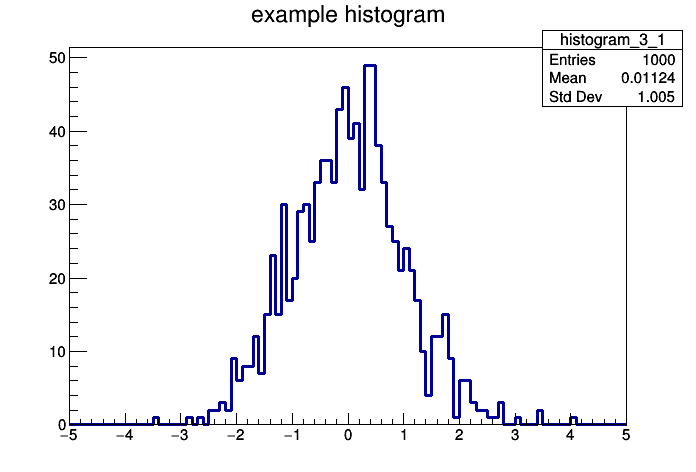

In [5]:
StandaloneApplication();

Compile the code with:

    g++ -o ExampleMacro_GUI ExampleMacro_GUI 'root-config --cflags --libs'

and execute the program with

    > ./ExampleMacro_GUI